In [2]:
install.packages('igraph')
install.packages('Matrix')
install.packages('pracma')

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpqUSKv4\downloaded_packages
package 'Matrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpqUSKv4\downloaded_packages
package 'pracma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpqUSKv4\downloaded_packages


In [3]:
library('igraph')
library('Matrix')
library('pracma')

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



## Part1_1 Structural properties of the Facebook network

### 1_1 Question 1

In [4]:
g<-read_graph('./facebook_combined/facebook_combined.txt', format = 'edgelist', directed=F)

In [5]:
summary(g)

IGRAPH 04af4b4 U--- 4039 88234 -- 


In [6]:
is_connected(g)

[1] TRUE

### 1_1 Question 2

In [7]:
diameter(g)

[1] 8

### 1_1 Question 3

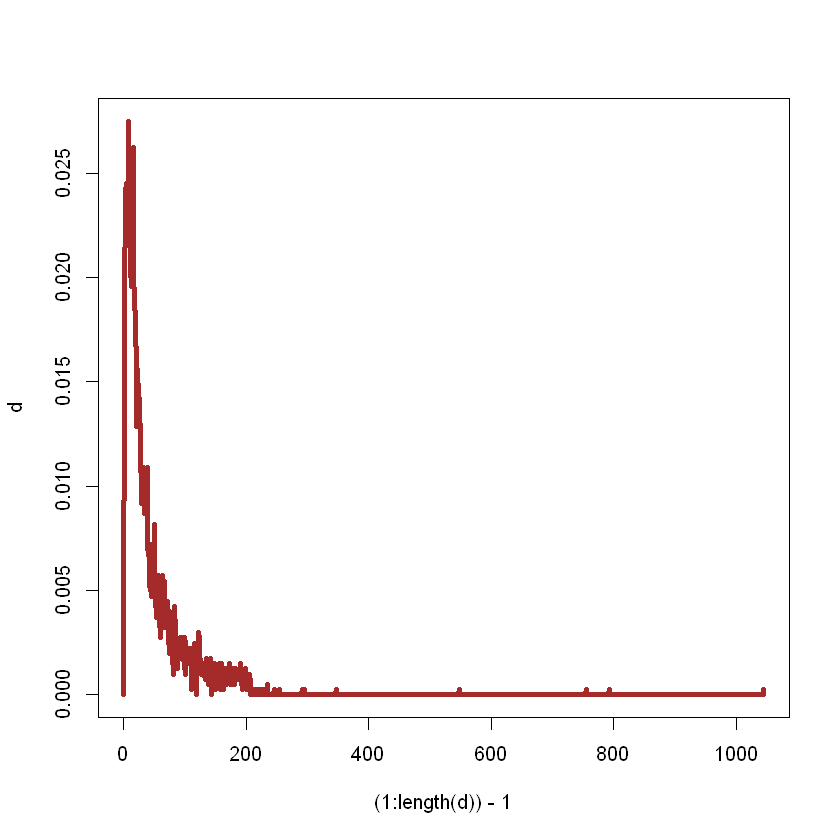

In [8]:
d <- degree_distribution(g)
plot((1:length(d))-1, d, type='l', col=colors()[32],lwd = 4)

### 1_1 Question 4

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1 x value <= 0 omitted from logarithmic plot"Warning message in xy.coords(x, y, xlabel, ylabel, log):
"819 y values <= 0 omitted from logarithmic plot"

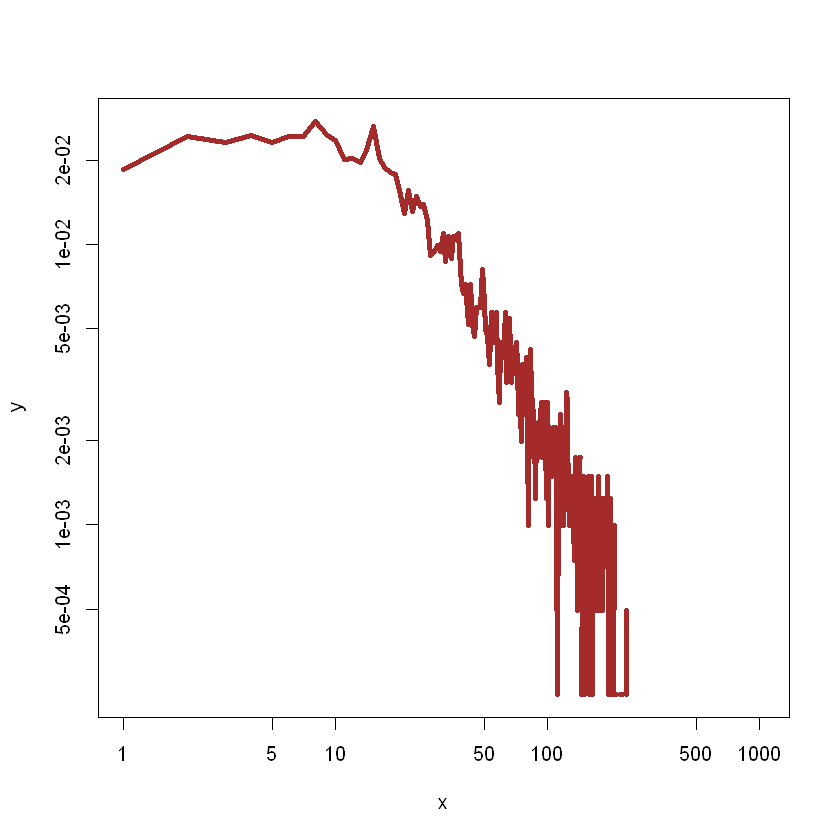

In [9]:
d <- degree_distribution(g)
x <- 1:length(d)-1
y <- d
plot(x, y, log = 'xy', type='l', col=colors()[32],lwd = 4)

In [10]:
x1 <- log10(x[y>0])
y1 <- log10(y[y>0])
lm(y1~x1)


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
    -0.4309      -1.1802  


## Part1_2 Personalized network

### 1_2 Question 5

In [11]:
eg <- make_ego_graph(g, order=1, nodes=1, mode="all")
eg

[[1]]
IGRAPH 0a6c4bf U--- 348 2866 -- 
+ edges from 0a6c4bf:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--10  4--10
[11]  1--11  1--12  1--13  1--14  1--15  1--16  1--17  1--18  1--19  1--20
[21] 18--20  1--21  3--21 15--21  1--22 10--22 14--22  1--23  8--23  1--24
[31]  1--25  1--26  4--26 10--26 22--26  1--27  4--27 10--27 14--27 22--27
[41] 26--27  1--28  1--29 15--29  1--30 17--30  1--31 10--31  1--32  8--32
[51] 22--32 26--32  1--33  1--34  1--35  1--36  1--37  1--38  1--39  8--39
[61]  1--40 22--40 26--40  1--41 22--41 26--41 27--41 30--41  1--42 15--42
[71] 18--42 20--42 21--42 29--42  1--43 34--43  1--44  1--45 21--45 42--45
[81]  1--46  1--47  1--48  1--49  2--49 31--49  1--50  1--51  1--52 24--52
+ ... omitted several edges


### 1_2 Question 6

In [12]:
diameter(eg[[1]])

[1] 2

### 1_2 Question 7___no code

## Part1_3 Core node’s personalized network

### 1_3 Question 8

In [13]:
id <- degree(g, v=V(g)) >= 200
nodes <- V(g)[id]
length(nodes)

[1] 41

In [14]:
mean(degree(g, v=nodes))

[1] 277.439

### 1_3 Question 9

In [15]:
nodes_pool <- c(1, 108, 349, 484, 1087)

[1] 0.4131014


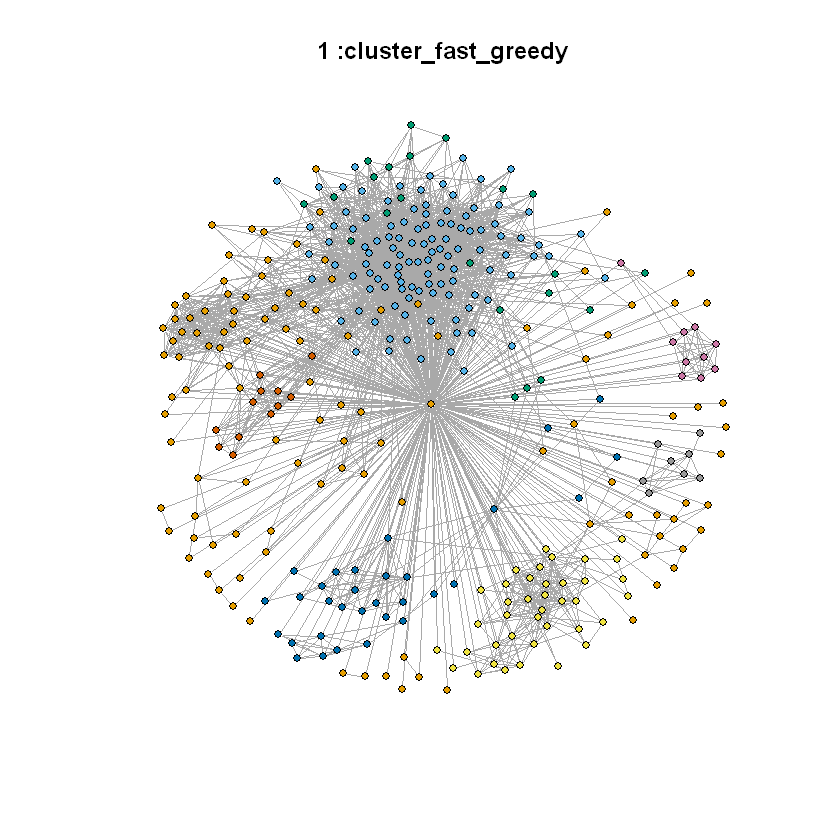

[1] 0.3533022


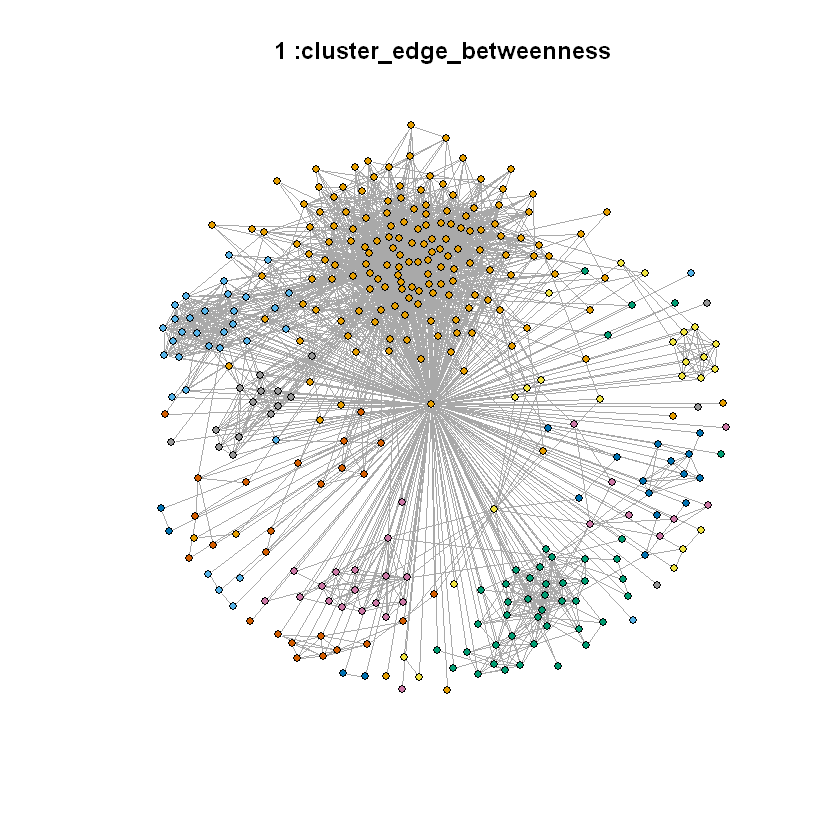

[1] 0.3891185


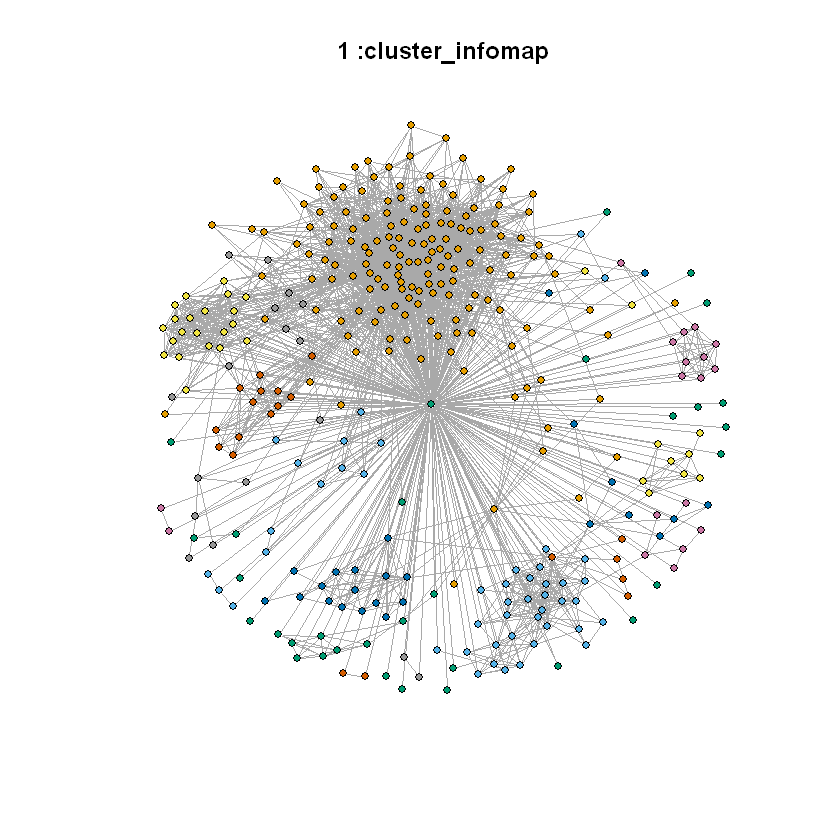

In [16]:
node <- nodes_pool[1]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.4359294


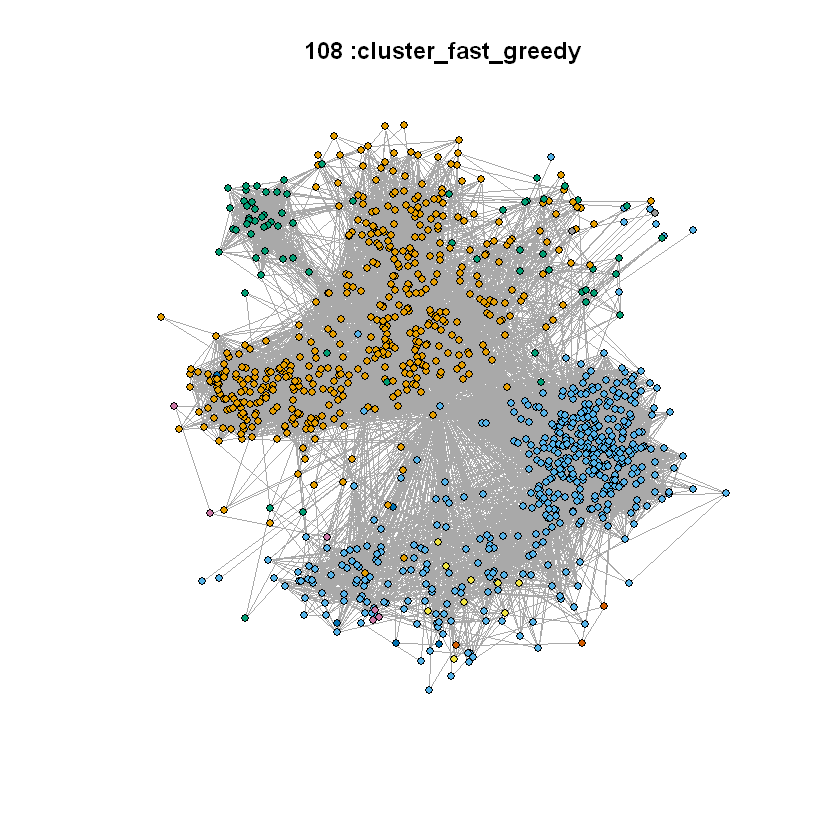

[1] 0.5067549


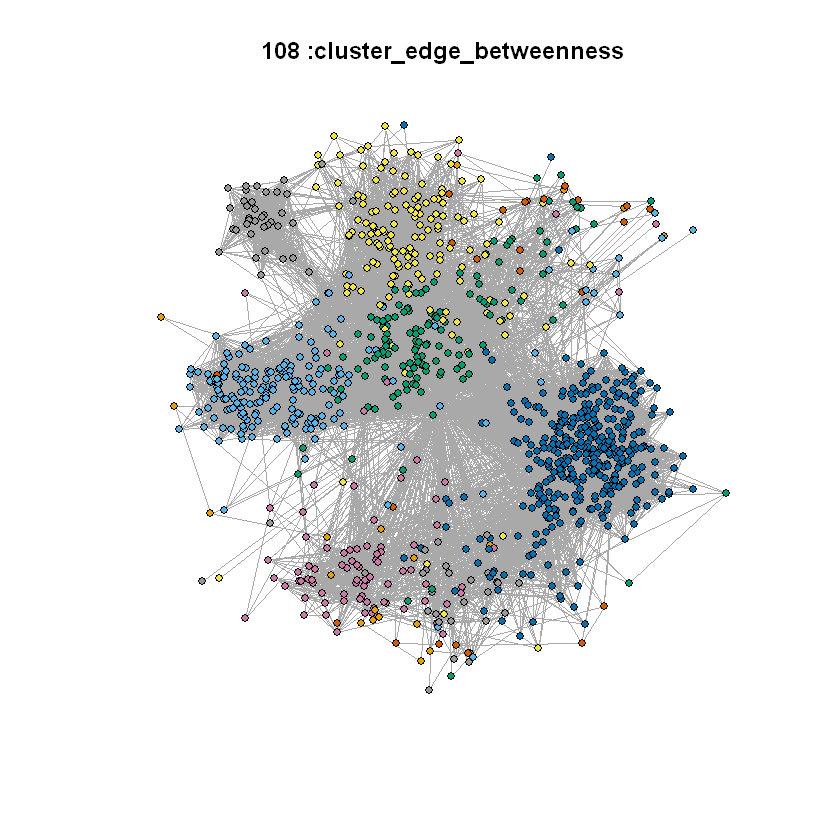

[1] 0.5082492


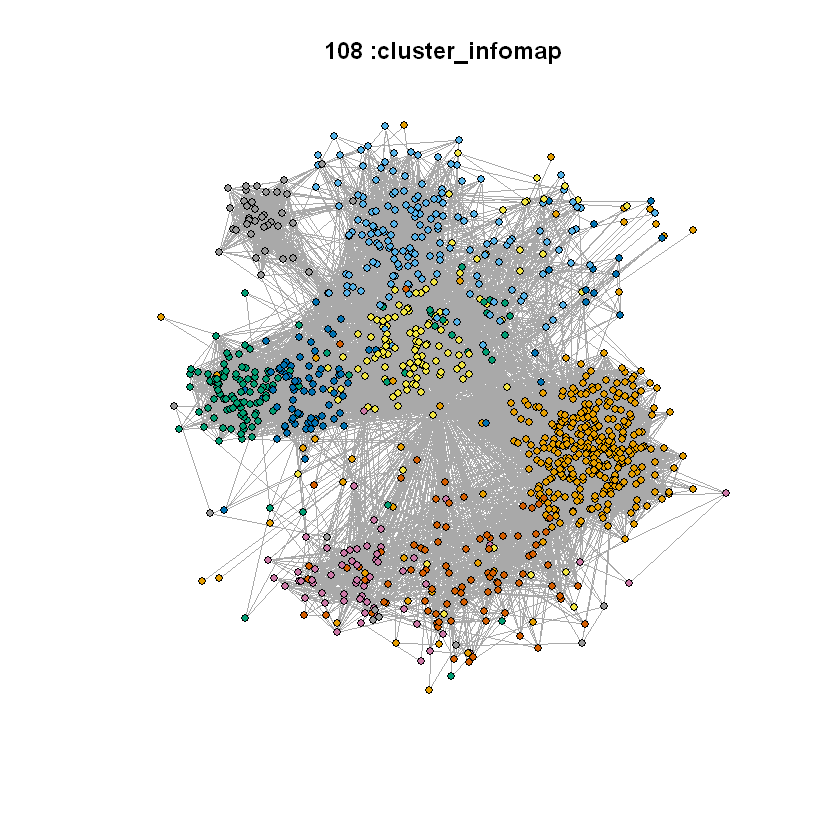

In [21]:
node <- nodes_pool[2]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.2517149


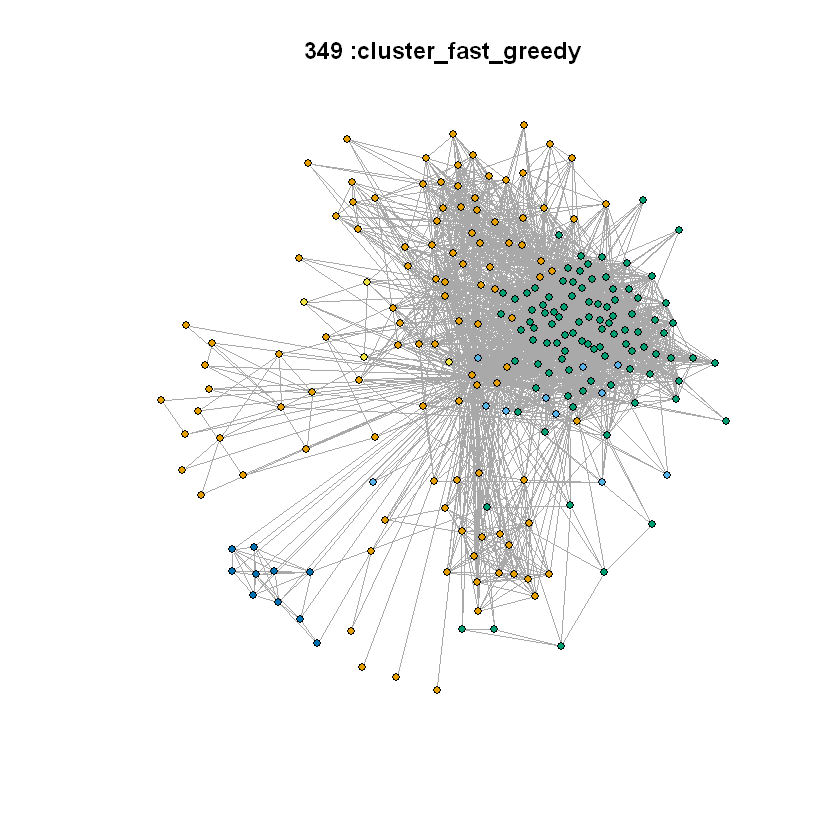

[1] 0.133528


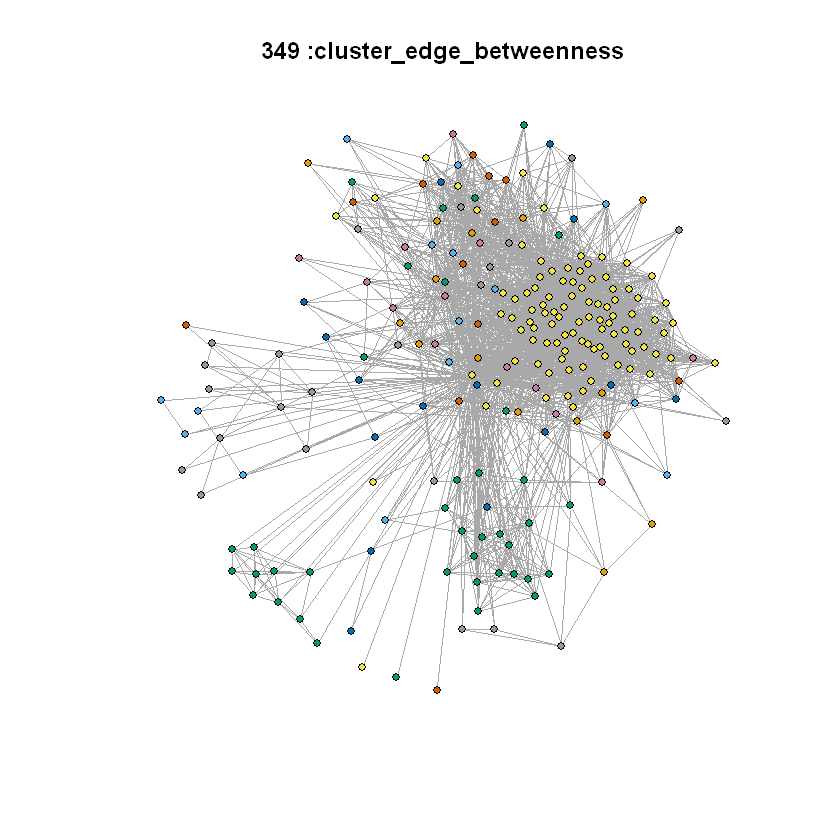

[1] 0.0954642


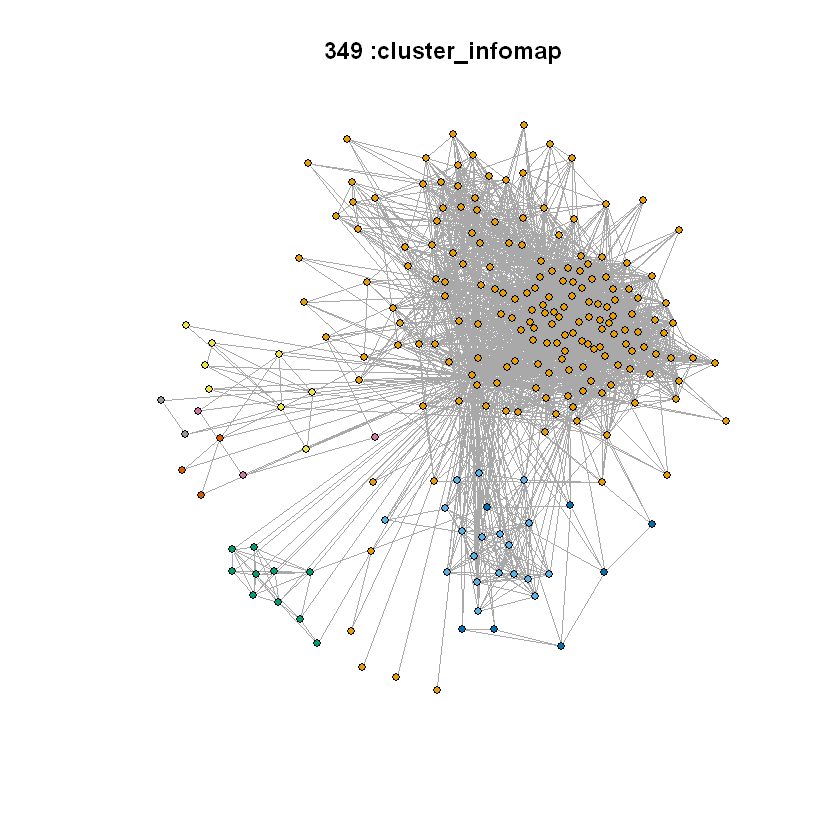

In [18]:
node <- nodes_pool[3]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.5070016


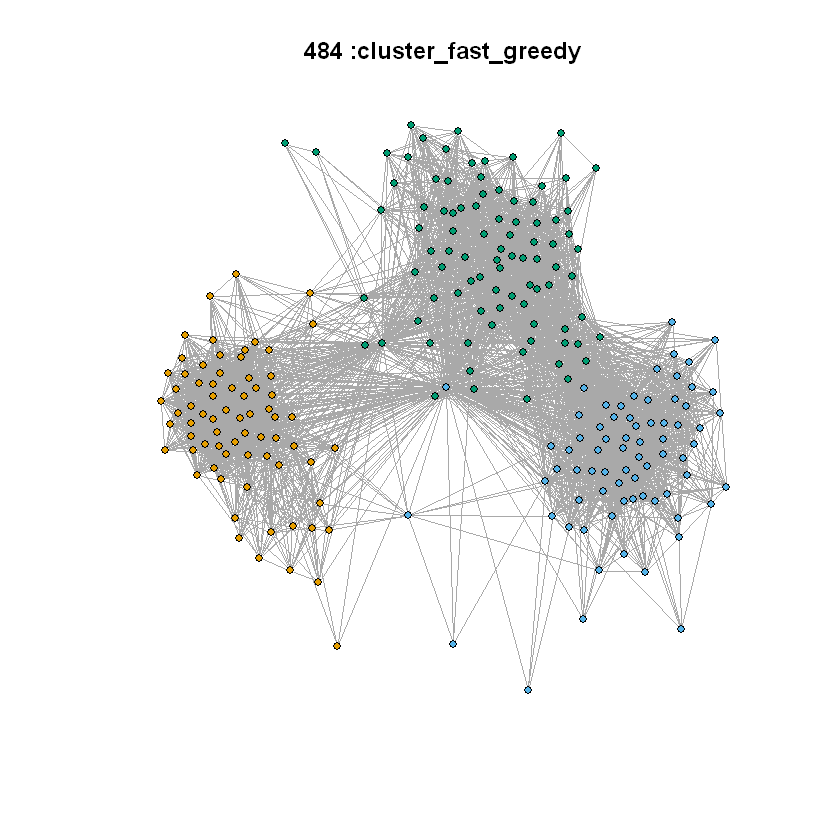

[1] 0.4890952


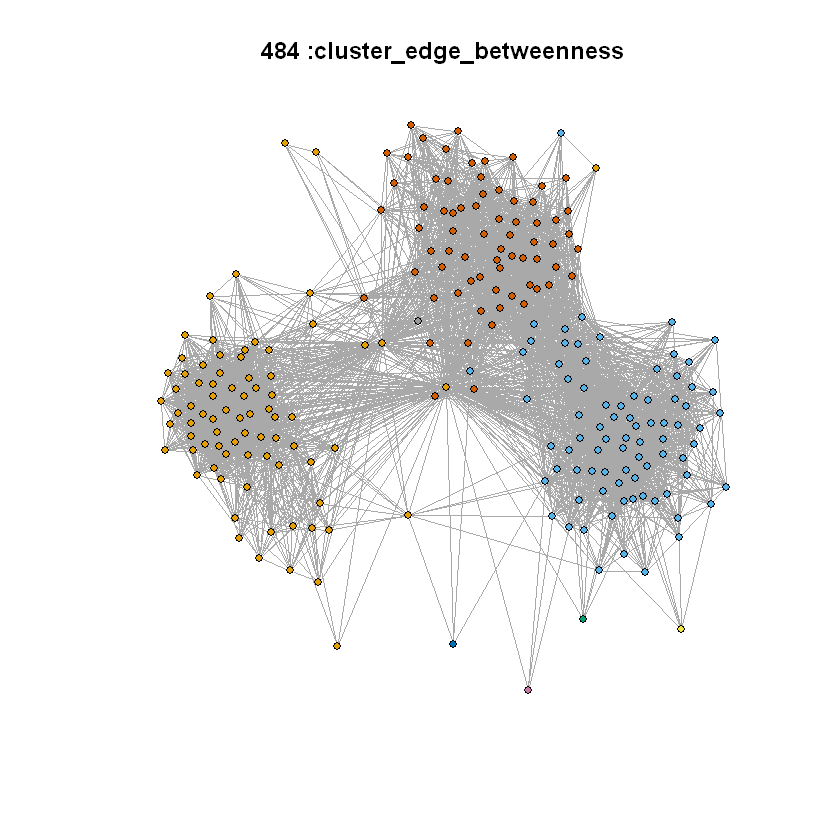

[1] 0.5152788


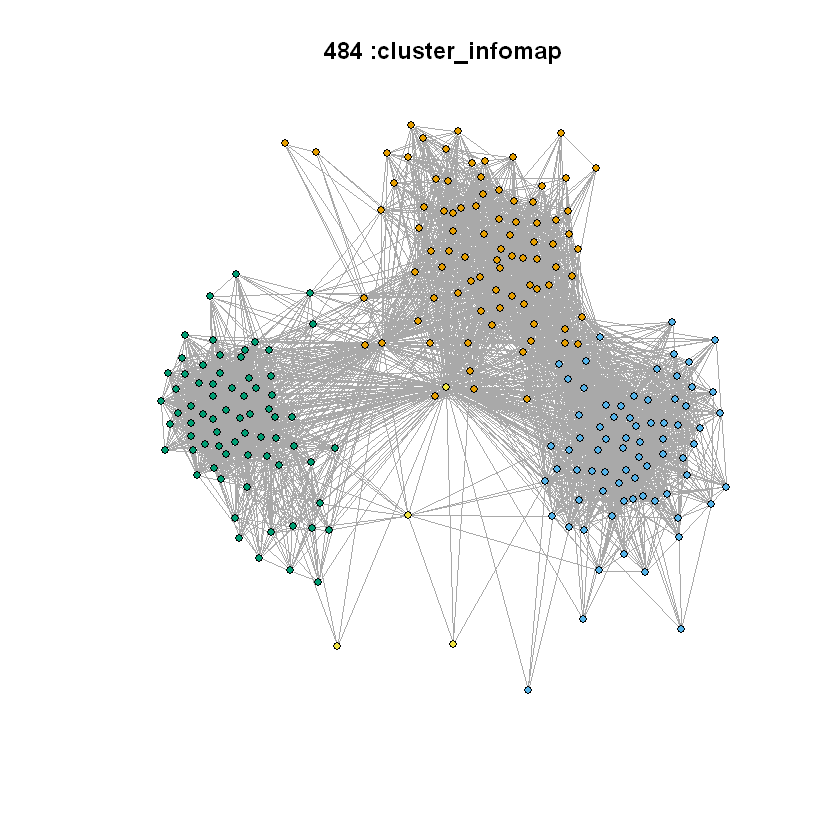

In [19]:
node <- nodes_pool[4]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.1455315


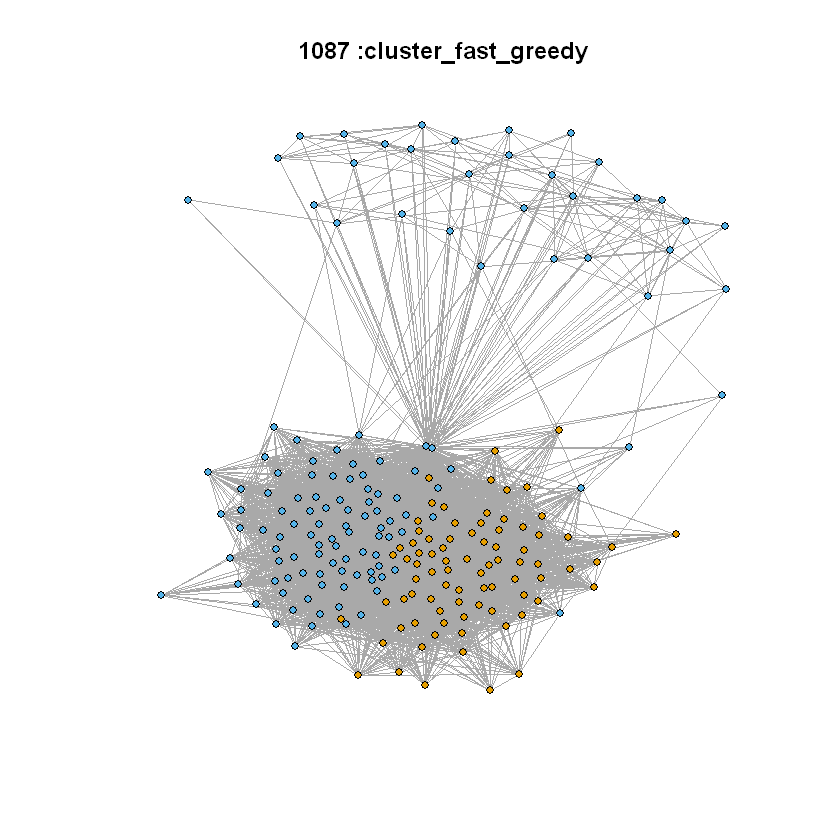

[1] 0.02762377


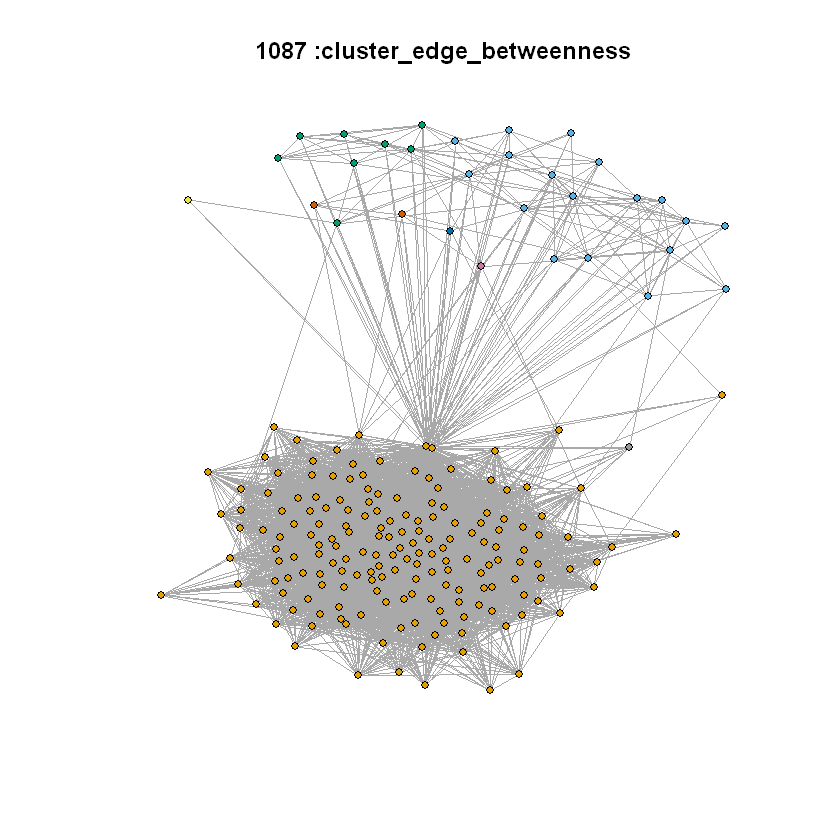

[1] 0.02690662


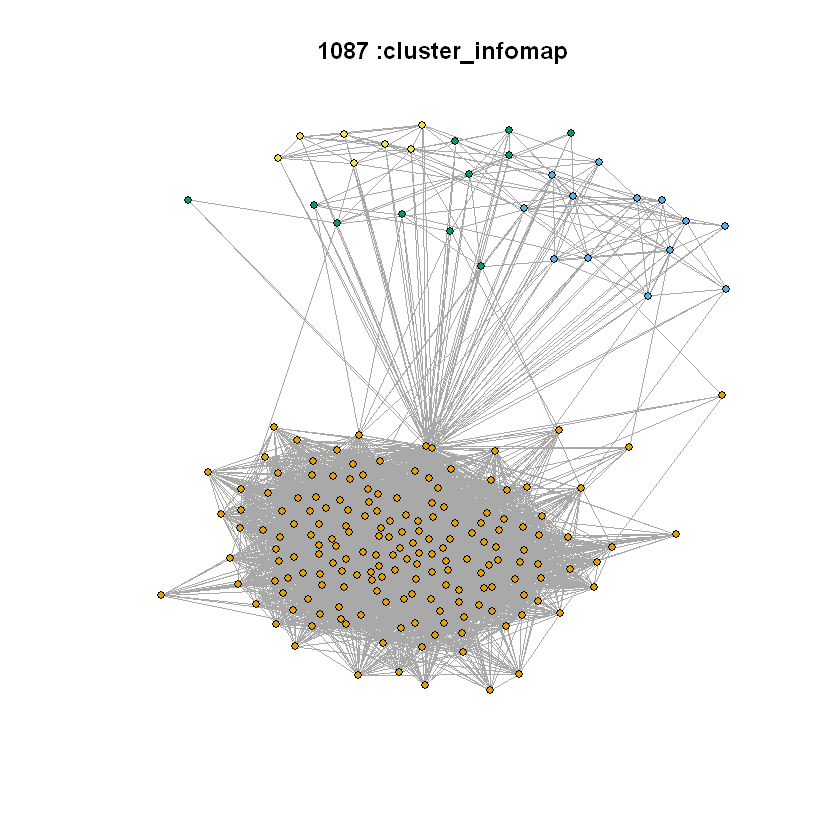

In [20]:
node <- nodes_pool[5]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

### 1_3 Question 10

[1] 0.4418533


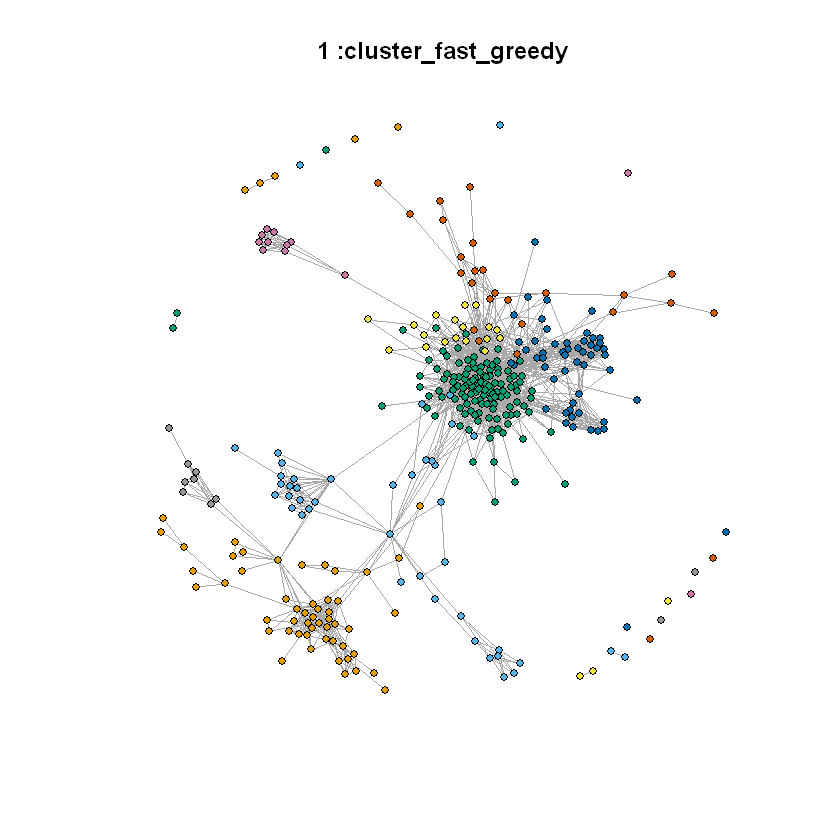

[1] 0.4161461


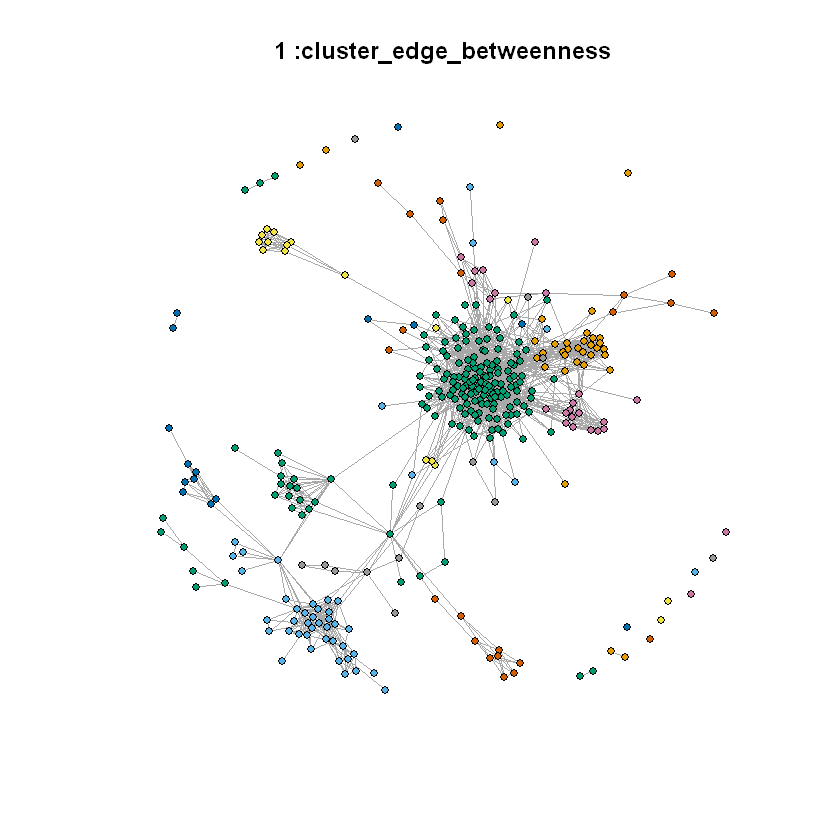

[1] 0.4180077


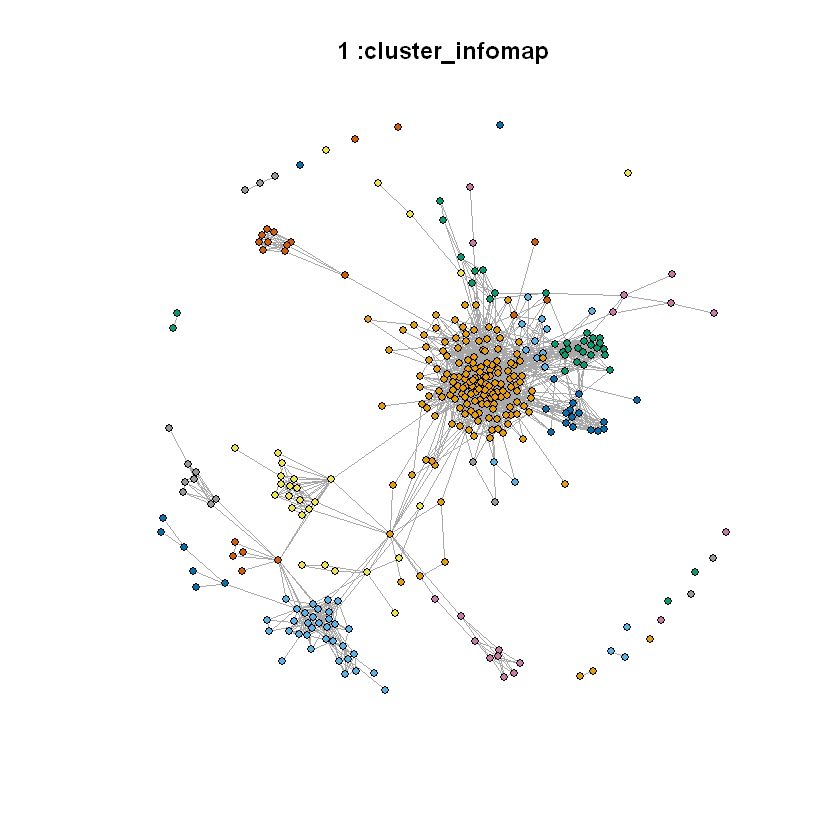

In [33]:
node <- nodes_pool[1]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.4359515


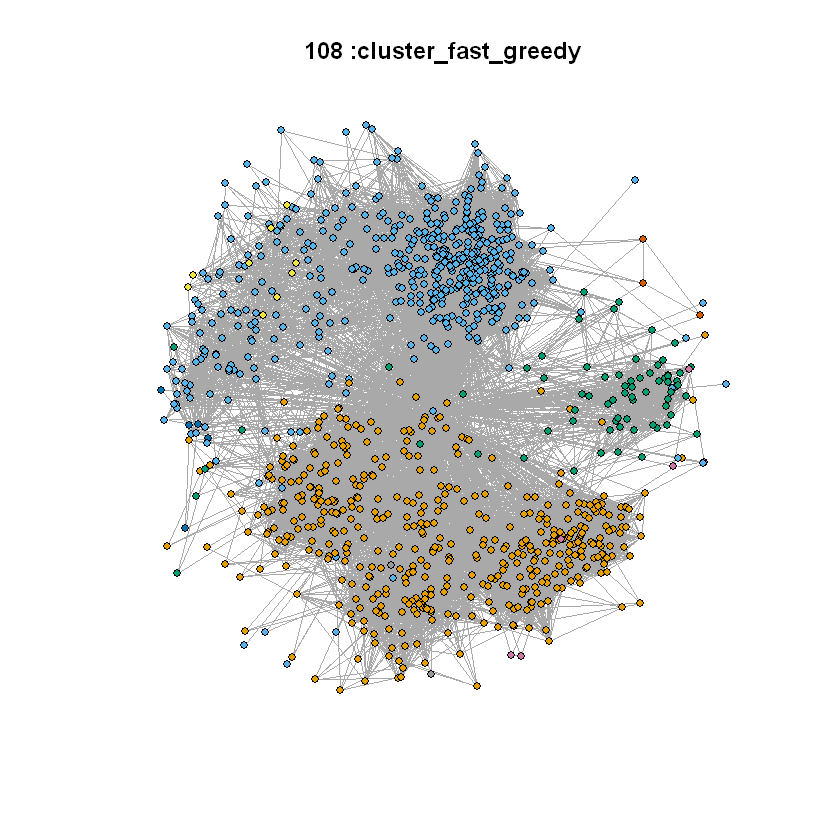

[1] 0.5056361


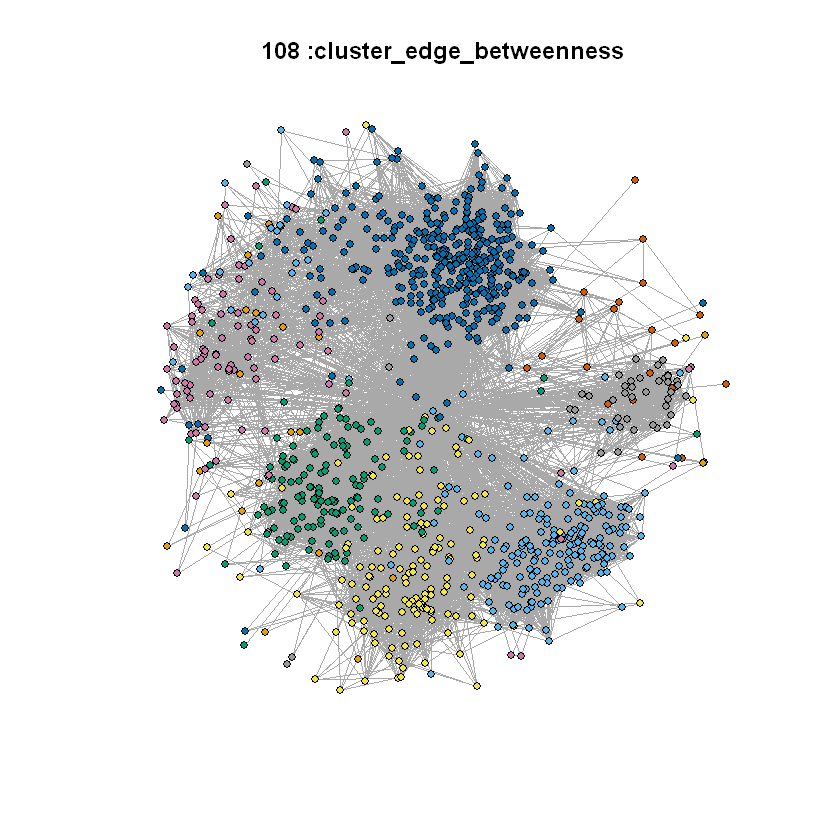

[1] 0.5081681


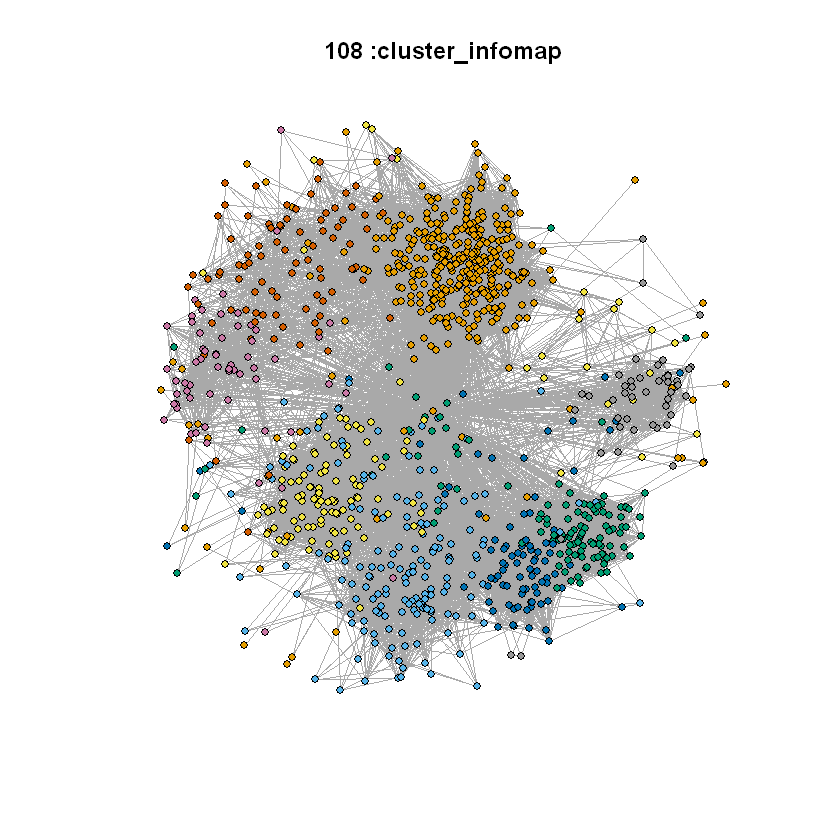

In [34]:
node <- nodes_pool[2]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.257489


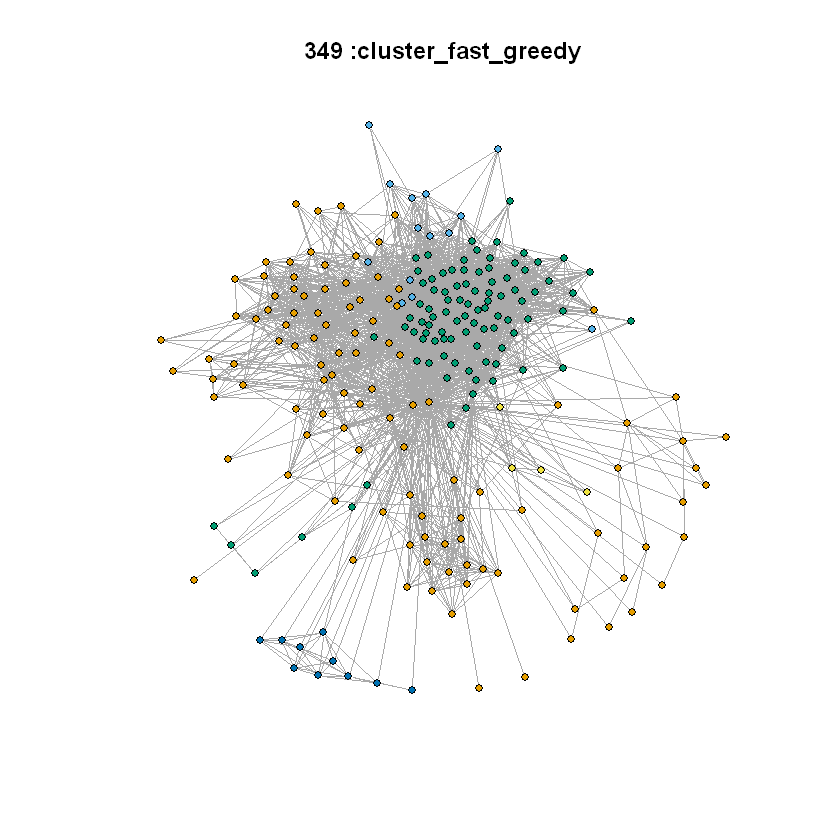

[1] 0.1337295


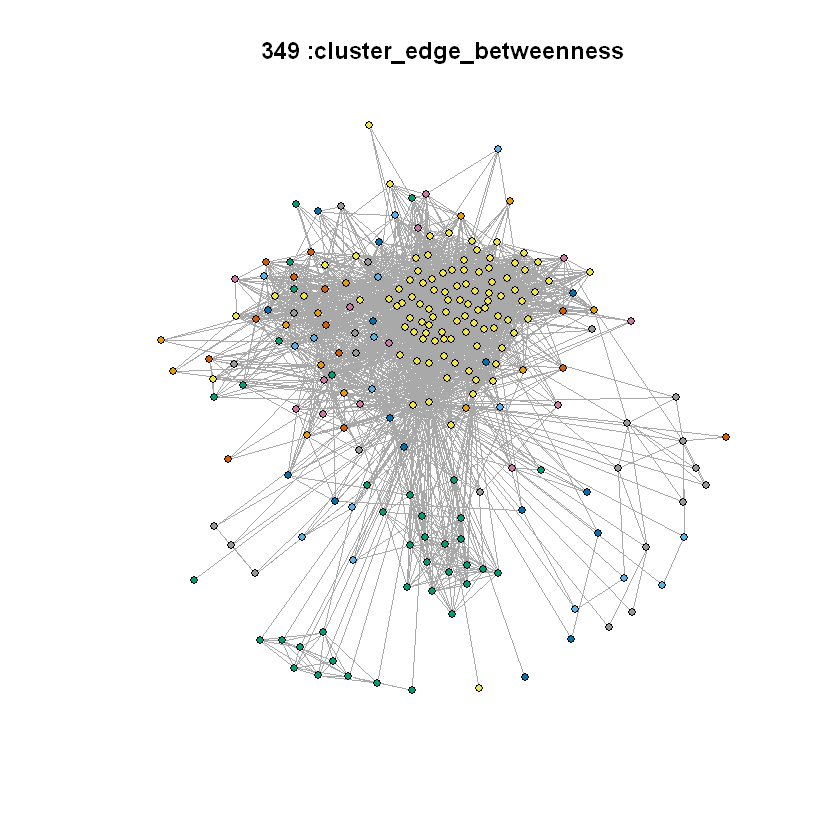

[1] 0.09509536


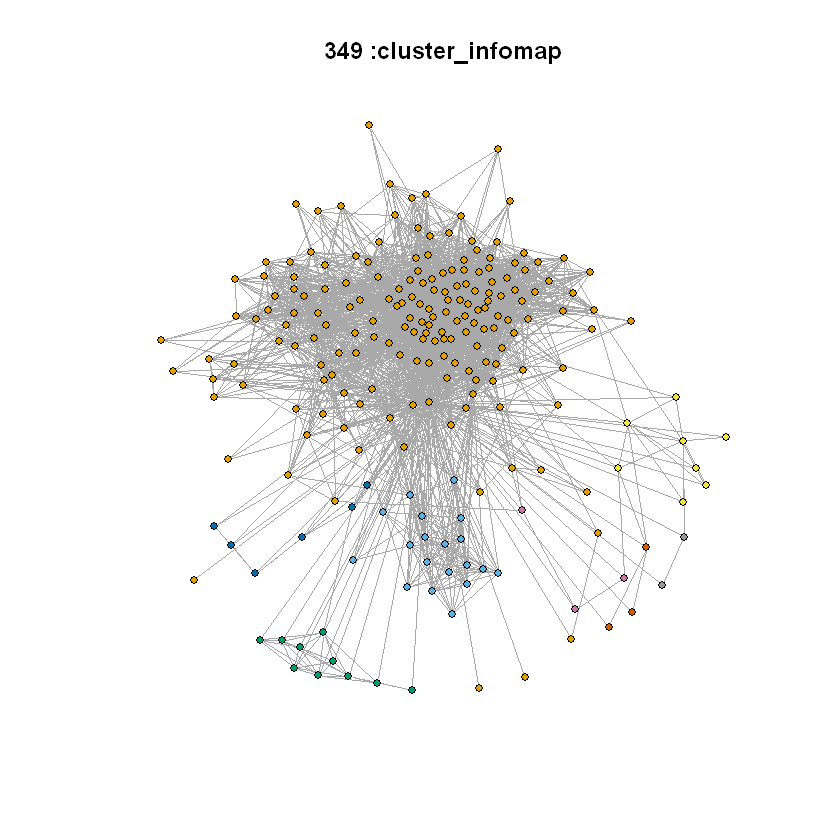

In [35]:
node <- nodes_pool[3]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.5211308


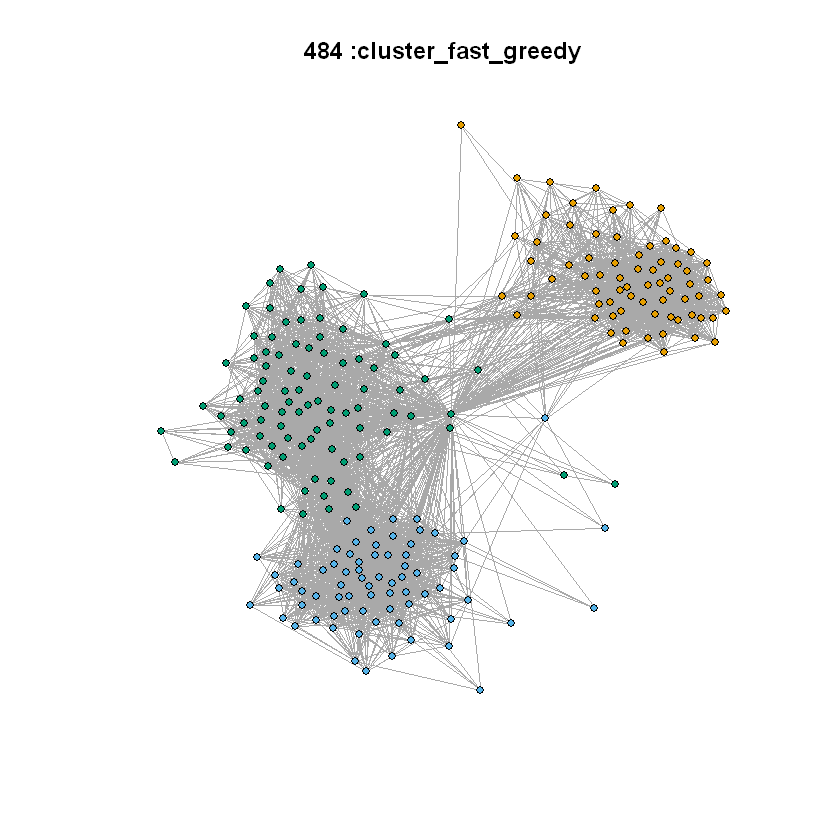

[1] 0.4956171


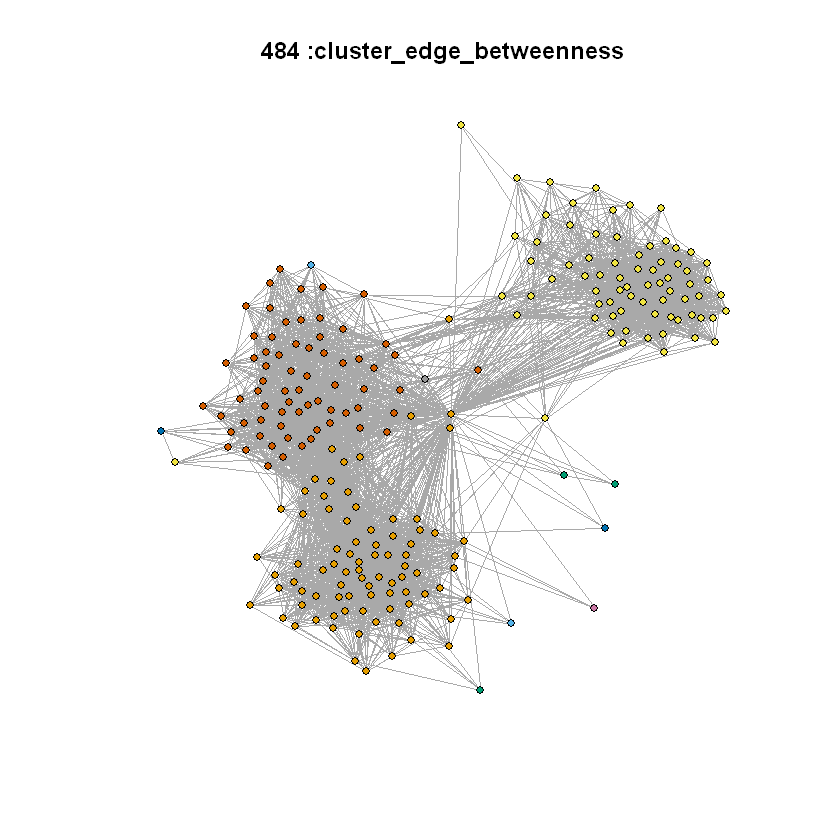

[1] 0.5291475


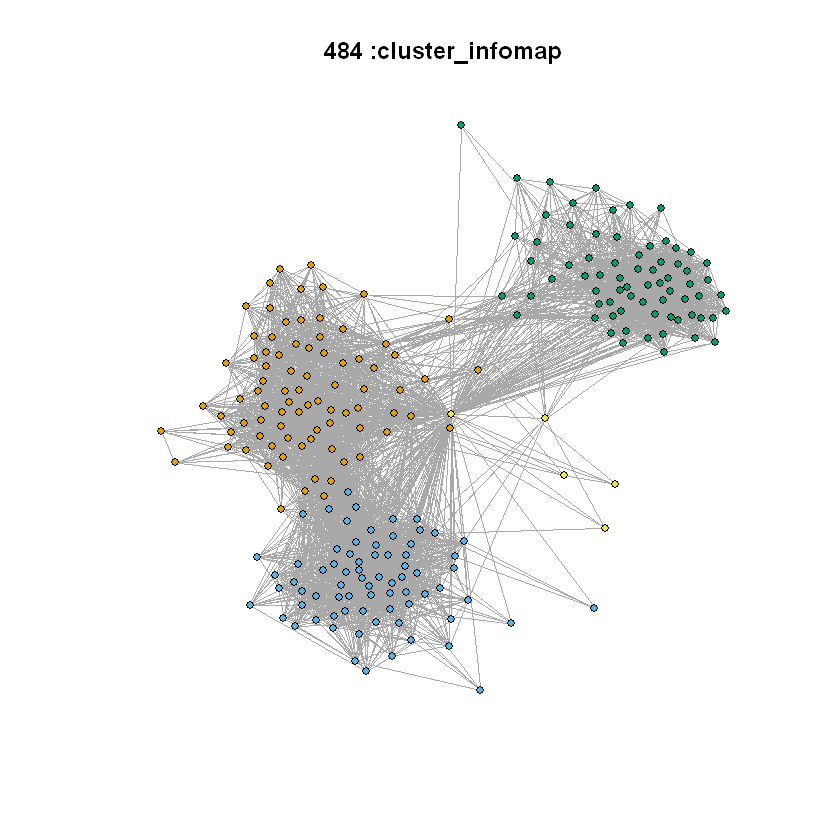

In [36]:
node <- nodes_pool[4]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

[1] 0.1481956


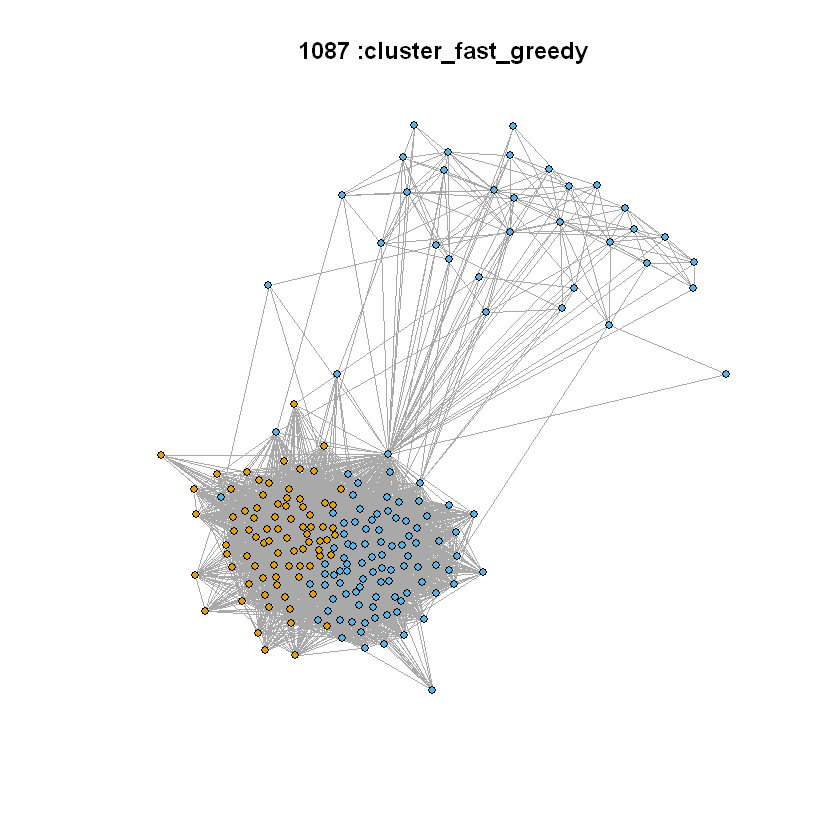

[1] 0.0324953


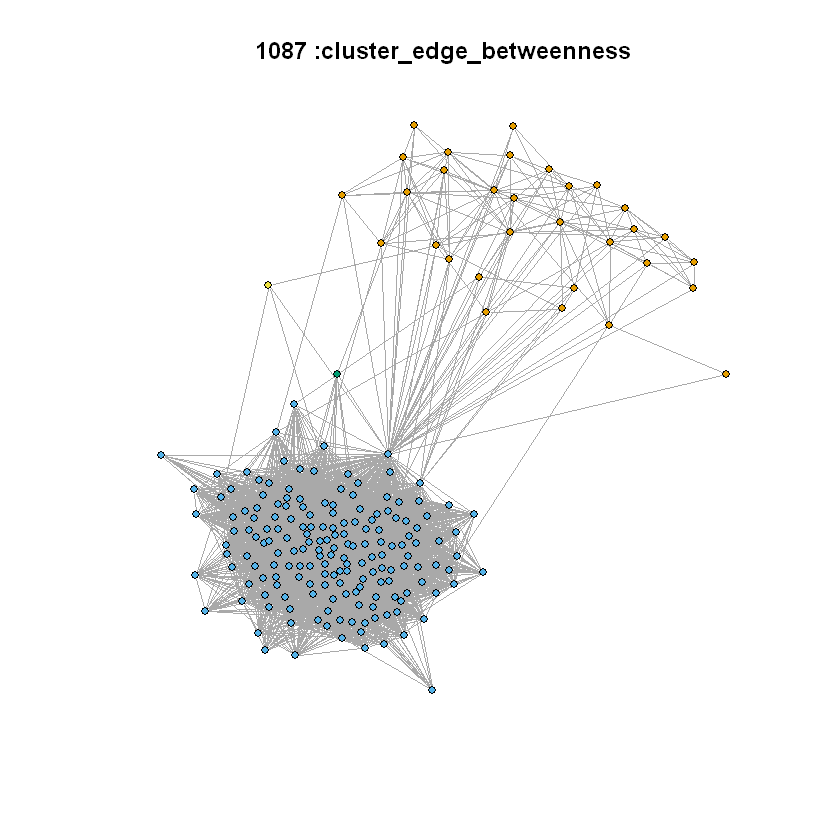

[1] 0.02737159


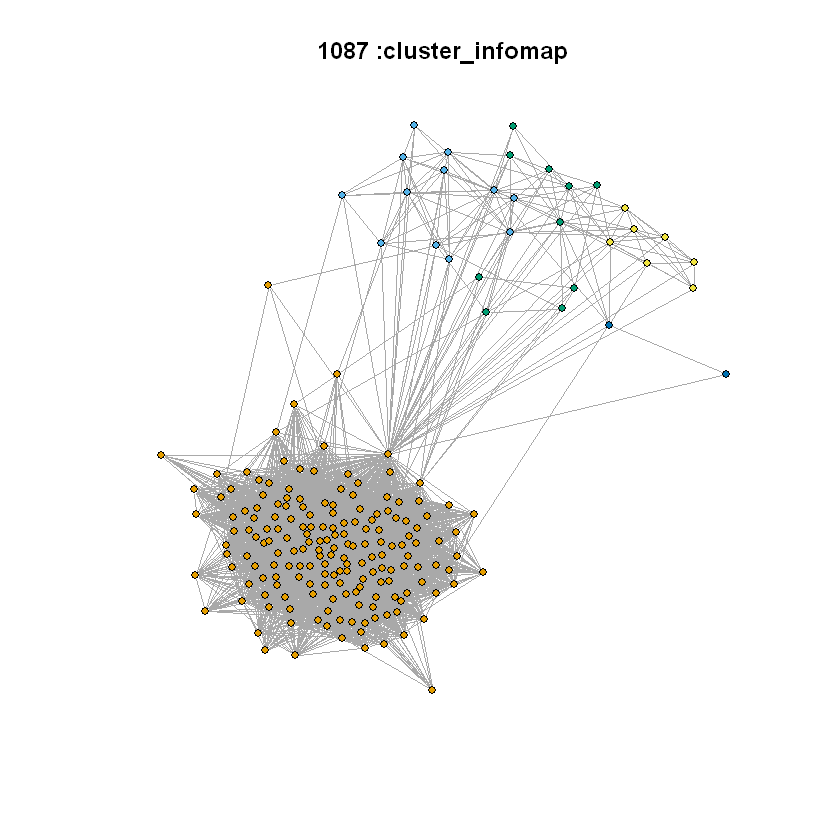

In [43]:
node <- nodes_pool[5]
eg <- make_ego_graph(g, order=1, nodes=node, mode="all")[[1]]
eg <- delete_vertices(eg, 1)

eg_coords <- layout_with_fr(eg)
eg_no_edges <- delete_edges(eg, E(eg))

eg_com1 <- cluster_fast_greedy(eg)
plot(eg, vertex.size=3, vertex.label=NA, vertex.color=membership(eg_com1), 
     layout=eg_coords, main=paste(node,':cluster_fast_greedy'))
print(modularity(eg_com1))


eg_com2 <- cluster_edge_betweenness(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com2), 
     layout=eg_coords, main=paste(node,':cluster_edge_betweenness'))
print(modularity(eg_com2))

eg_com3 <- cluster_infomap(eg)
plot(eg,vertex.size=3, vertex.label=NA, 
     vertex.color=membership(eg_com3), 
     layout=eg_coords, main=paste(node,':cluster_infomap'))
print(modularity(eg_com3))

### 1_3 Question 11

## Part1_4 Friend recommendation in personalized networks

### 1_4 Question 16